# -----------------------CAPSTONE PROJECT ANALYSIS--------------------

**IMPORTING ALL LIBRARY TO RUN DATASET**

In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

**Load All the Data**

In [3]:
# Load data
df = pd.read_csv('Campaign_Data.csv')

In [4]:
# Load data
cust_df = pd.read_excel('Customer Reviews.xlsx')

In [5]:
# Load data
deliv_df = pd.read_csv('Customer_Delivery_Data.csv')

In [6]:
# Load data
mst_df = pd.read_csv('Customer_Master_Data.csv')

# CAMPAIGN DATA

**campaign data column name and few data in head**

In [7]:
df.head()

,CustID,status,Campaign_Exec_Date,Campaign_Channel
0,11111J11RREFG1VoGo1FejtGEVV88JtM,viewed,2019-05-28,Email
1,11111J11RREFG1VoGo1FejtGEVV88JtM,delivered,2019-05-29,Email
2,11111J11RREFG1VoGo1FejtGEVV88JtM,delivered,2019-05-30,Email
3,11111J11RREFG1VoGo1FejtGEVV88JtM,delivered,2019-06-03,Email
4,11111J11RREFG1VoGo1FejtGEVV88JtM,delivered,2019-06-04,Email


In [8]:
#df.set_index('day',inplace=True) ------------ to remove the index column we will run this code

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10912592 entries, 0 to 10912591
Data columns (total 4 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   CustID              object
 1   status              object
 2   Campaign_Exec_Date  object
 3   Campaign_Channel    object
dtypes: object(4)
memory usage: 333.0+ MB


In [10]:
df.describe()

,CustID,status,Campaign_Exec_Date,Campaign_Channel
count,10912592,10912592,10912592,10912592
unique,371216,4,525,2
top,E7H7JeJo118eH7J1FRFEtFA7GRMjojHH,viewed,2020-11-28,Email
freq,68,5697853,327960,10527383


# CLEANING DATASET

**Finding if any null value is there in any column of the data**

In [11]:
df['CustID'].isnull().sum()

0

In [12]:
for i in df.columns:
    print(i, df[i].isnull().sum())

CustID 0
status 0
Campaign_Exec_Date 0
Campaign_Channel 0


**value count to see the data is right or wrong**

In [13]:
df['CustID'].value_counts()

CustID
E7H7JeJo118eH7J1FRFEtFA7GRMjojHH    68
t1ARH78VE78EG7GGGVFHM7otoFFGFRF7    68
8t78Je187J                          67
HHjHMR1ojMtVGoAoAF1MMM78eEVtGoRA    67
8EVGjGRR7J1GA7VeMHFo7etoV8VtjoJe    67
                                    ..
MVFjHtJMHeHeMV7etGF1E1MG7EFeHR8H     1
MVFj8o1GGEj8tMRF7E18eMjeoFAVVMAJ     1
MVFetMtAHA1HMHH1AJ87j8F7jEFEtAG7     1
MVFejH8tGeoVVte17EMjJAGJMjVEFeeH     1
Eo7j87GMJRHoGJ88tEAHEo7ejR8JHFGe     1
Name: count, Length: 371216, dtype: int64

**df['CustID'] - converting datatype to integer**

In [14]:
# Create a mapping from CustID to a unique integer (converted data to integer)
custid_mapping = {custid: idx for idx, custid in enumerate(df['CustID'].unique())}
custid_mapping

{'11111J11RREFG1VoGo1FejtGEVV88JtM': 0,
 '11111eEGRAAotVot7etA7JGJ78FARFHo': 1,
 '11111oGeEMotjJGVE81EjERjMHVjVtR7': 2,
 '1111E7j87VGjFoooHeMoR7eFRtVVVEoA': 3,
 '1111ReVAoMRMGFRRVjoJHMEJ1teVGjFJ': 4,
 '1111RtJ17H1FAVJR7HAo8ttGoGHF7GAH': 5,
 '1111VeAeMERFe7o7FM88HtjtVjJVjJFM': 6,
 '1111eAeoeo': 7,
 '1111jAH1JGtRFGtR7jGHMMRGe1GjVMEV': 8,
 '1111jHtt8FAoGj8eEtG1HRVRoG1RFeR1': 9,
 '1111joeRMVtH8JMtHVEo8jRo1oARMR17': 10,
 '1117EMoVFV8A1HGM8A18AHMoeH8j1VFe': 11,
 '1117Ej7H8FjeJ18JMGetM7GeHVt7J8H1': 12,
 '1117JtRtHGRV7ojJ1JAHJe17Rt8GA1AH': 13,
 '1117RoEGM8JHGeHH77R8GtAFMJEjGMVH': 14,
 '1117eJjAHGtERtEJetJMMR1eAo8RR117': 15,
 '1117eM1e8FGMV8HVRJ8t7GGjtR7t8JjH': 16,
 '111818JoHo7tEetAjMMJR81FFeoVFAeH': 17,
 '1118AJFoRAGE17GAHVeAjAtMo7EEMHGV': 18,
 '1118AjGjHt17RVGFeHeoRtJVMJRMEA88': 19,
 '1118EHA8HMFj7oJMtFMt7JHF1AjHoM8V': 20,
 '1118FFMGVt1eRoF7jFeA7Ft1GFFHFAEG': 21,
 '1118jEVVjee8FJF118JAARt8Ejoj1toj': 22,
 '1118oHAjVAJ1Hj71HRV1F1V1HJoHJFeV': 23,
 '111A8eGMtt7MjEooERjEE817VttAjVeo': 24,
 '111A8

In [15]:
# Map CustID to integers (uses the mapping to replace each CustID with its corresponding integer.)
df['CustID'] = df['CustID'].map(custid_mapping)
df['CustID']

0                0
1                0
2                0
3                0
4                0
             ...  
10912587    371215
10912588    371215
10912589    371215
10912590    371215
10912591    371215
Name: CustID, Length: 10912592, dtype: int64

In [16]:
df.head()

,CustID,status,Campaign_Exec_Date,Campaign_Channel
0,0,viewed,2019-05-28,Email
1,0,delivered,2019-05-29,Email
2,0,delivered,2019-05-30,Email
3,0,delivered,2019-06-03,Email
4,0,delivered,2019-06-04,Email


**Campaign_Exec_Date - convert object datatype to date**

In [17]:
df['Campaign_Exec_Date']

0           2019-05-28
1           2019-05-29
2           2019-05-30
3           2019-06-03
4           2019-06-04
               ...    
10912587    2020-11-24
10912588    2020-11-25
10912589    2020-11-26
10912590    2020-11-27
10912591    2020-11-28
Name: Campaign_Exec_Date, Length: 10912592, dtype: object

In [18]:
df['Campaign_Exec_Date'] = pd.to_datetime(df['Campaign_Exec_Date'], format='%Y-%m-%d')  # Change the format as needed
df['Campaign_Exec_Date']

0          2019-05-28
1          2019-05-29
2          2019-05-30
3          2019-06-03
4          2019-06-04
              ...    
10912587   2020-11-24
10912588   2020-11-25
10912589   2020-11-26
10912590   2020-11-27
10912591   2020-11-28
Name: Campaign_Exec_Date, Length: 10912592, dtype: datetime64[ns]

In [19]:
df['Campaign_Exec_Date'].describe()

count                         10912592
mean     2020-03-05 09:35:02.544583424
min                2019-01-01 00:00:00
25%                2019-09-11 00:00:00
50%                2019-12-29 00:00:00
75%                2020-10-20 00:00:00
max                2021-02-04 00:00:00
Name: Campaign_Exec_Date, dtype: object

In [20]:
df['Campaign_Channel'].unique()

array(['Email', 'SMS'], dtype=object)

In [21]:
df['status'].unique()

array(['viewed', 'delivered', 'click', 'clicked'], dtype=object)

**Encoding Categorical Variables - Convert Categorical Features to Numerical Values**

**Converting all objects values to numeric form**

In [22]:
cat_col = df.select_dtypes('object')

In [23]:
cat_col

,status,Campaign_Channel
0,viewed,Email
1,delivered,Email
2,delivered,Email
3,delivered,Email
4,delivered,Email
...,...,...
10912587,viewed,Email
10912588,viewed,Email
10912589,viewed,Email
10912590,delivered,Email


In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
lbl = LabelEncoder()

In [26]:
lbl.fit_transform(cat_col['status'])

array([3, 2, 2, ..., 3, 2, 2])

In [27]:
for i in cat_col:
    cat_col[i] = lbl.fit_transform(cat_col[i])

In [28]:
cat_col

,status,Campaign_Channel
0,3,0
1,2,0
2,2,0
3,2,0
4,2,0
...,...,...
10912587,3,0
10912588,3,0
10912589,3,0
10912590,2,0


In [29]:
df.head()

,CustID,status,Campaign_Exec_Date,Campaign_Channel
0,0,viewed,2019-05-28,Email
1,0,delivered,2019-05-29,Email
2,0,delivered,2019-05-30,Email
3,0,delivered,2019-06-03,Email
4,0,delivered,2019-06-04,Email


In [228]:
# Save DataFrame to CSV
df.to_csv('df.csv', index=False)

# Customer_Master_Data 

In [30]:
mst_df.head()

,CustID,Gender,Marital_Status,Pincode,State
0,7teAttAeH,NaN,NaN,678506.0,Keral
1,7t8tJJHt7,NaN,NaN,770001.0,Odisha
2,787t17tJt,NaN,NaN,245101.0,Uttar Pradesh
3,787ttJtHH,NaN,NaN,673008.0,Keral
4,7878HHoHo,NaN,NaN,501510.0,Telangana


In [31]:
mst_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502121 entries, 0 to 502120
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   CustID          502121 non-null  object
 1   Gender          364467 non-null  object
 2   Marital_Status  67995 non-null   object
 3   Pincode         492249 non-null  object
 4   State           492181 non-null  object
dtypes: object(5)
memory usage: 19.2+ MB


In [32]:
# finding null value percentage to further steps

In [33]:
364467/502121

0.7258549234148741

In [34]:
67995/502121

0.13541556716408992

In [35]:
492249/502121

0.9803394002640797

In [36]:
492181/502121

0.9802039747391565

In [37]:
mst_df.describe()

,CustID,Gender,Marital_Status,Pincode,State
count,502121,364467,67995,492249.0,492181
unique,502121,3,2,17407.0,36
top,7teAttAeH,Male,Unmarried,122001.0,Maharashtra
freq,1,292764,45242,7055.0,129345


In [38]:
for i in mst_df.columns:
    print(i, mst_df[i].isnull().sum())

CustID 0
Gender 137654
Marital_Status 434126
Pincode 9872
State 9940


In [39]:
mst_df['Gender'].unique()

array([nan, 'Male', 'Female', 'Transgender'], dtype=object)

In [40]:
mst_df['Marital_Status'].unique()

array([nan, 'Unmarried', 'Married'], dtype=object)

In [41]:
mst_df['Pincode'].unique()

array([678506.0, 770001.0, 245101.0, ..., 522613.0, 388550.0, 756133.0],
      dtype=object)

In [42]:
mst_df['State'].unique()

array(['Keral', 'Odisha', 'Uttar Pradesh', 'Telangana', nan,
       'West Bengal', 'Delhi', 'Andhra Pradesh', 'Maharashtra',
       'Karnataka', 'Gujarat', 'Tamil Nadu', 'Haryana', 'Madhya Pradesh',
       'Punjab', 'Rajasthan', 'Himachal Pradesh', 'Chhatisgarh', 'Bihar',
       'Assam', 'Goa', 'Uttarakhand', 'Jharkhand', 'Tripura',
       'Jammu & Kashmir', 'Jammu And Kashmir', 'Diu & Daman',
       'Andaman & Nicobar', 'Manipur', 'Arunachal Pradesh', 'Pondicherry',
       'Leh Ladhak', 'Meghalaya', 'Nagaland', 'Sikkim', 'Mizoram',
       'Gurugram'], dtype=object)

In [43]:
mst_df['CustID'].unique()

array(['7teAttAeH', '7t8tJJHt7', '787t17tJt', ...,
       'EEEEoREMHejJJjoEoReGRJ1Fe771ERGJ',
       'EEEE81e8oHt7HAFGjt8M81MGRM8JjVtj',
       'EEEEEHR1AtVJ11E1GF7MG8EFEEF1MGGM'], dtype=object)

In [44]:
# Create a mapping from CustID to a unique integer (converted data to integer)
custid_map = {custid: idx for idx, custid in enumerate(mst_df['CustID'].unique())}
custid_map

# Map CustID to integers (uses the mapping to replace each CustID with its corresponding integer.)
mst_df['CustID'] = mst_df['CustID'].map(custid_map)
mst_df['CustID']

0              0
1              1
2              2
3              3
4              4
           ...  
502116    502116
502117    502117
502118    502118
502119    502119
502120    502120
Name: CustID, Length: 502121, dtype: int64

In [45]:
# Convert Pincode to numeric, forcing errors to NaN (if any non-numeric values)
mst_df['Pincode'] = pd.to_numeric(mst_df['Pincode'], errors='coerce')

In [46]:
# Handle NaN values if needed (e.g., replace with a default value or drop)
mst_df['Pincode'] = mst_df['Pincode'].fillna(-1)  # Replace NaNs with -1

# Convert to integer
mst_df['Pincode'] = mst_df['Pincode'].astype(int)

In [47]:
mst_df['Pincode']

0         678506
1         770001
2         245101
3         673008
4         501510
           ...  
502116    141010
502117    560059
502118    560085
502119    411007
502120    400614
Name: Pincode, Length: 502121, dtype: int32

In [48]:
# Gender column - the percentage of nan values was 0.7258549234148741 (72%)so we had remove the nan value from this column

In [49]:
most_freq_gender = mst_df['Gender'].mode()[0]

# Impute missing values with the mode
mst_df['Gender'].fillna(most_freq_gender, inplace=True)

In [50]:
# Pincode column - the percentage of nan values was 0.9803394002640797 (98%) so we had remove the nan value from this column

In [51]:
# Mean and Median: Not suitable for categorical or ordinal data like pincodes.
# Mode: May not be effective due to the high percentage of missing data.
# Drop Column: Often the most practical solution if the column is not critical.
# Impute with Placeholder: Useful if you need to keep the column with an indication of missing data.

In [52]:
# Remove rows where 'pincode' column has NaN values (so we have drop the column)
Pincode = mst_df.drop(columns=['Pincode'], inplace=True)

In [53]:
# state column - the percentage of nan values was 0.9802039747391565 (98%) so we have use the mode to replace nan value from this column

In [54]:
# Calculate the mode of the 'State' column
mode_state = mst_df['State'].mode()[0]  # mode() returns a Series; [0] gets the first mode

# Impute missing values with the mode
mst_df['State'].fillna(mode_state, inplace=True)

In [55]:
# Calculate the mode of the 'Marital_Status' column
mode_status = mst_df['Marital_Status'].mode()[0]

# Impute missing values with the mode
mst_df['Marital_Status'].fillna(mode_status, inplace=True)

In [56]:
mst_df

,CustID,Gender,Marital_Status,State
0,0,Male,Unmarried,Keral
1,1,Male,Unmarried,Odisha
2,2,Male,Unmarried,Uttar Pradesh
3,3,Male,Unmarried,Keral
4,4,Male,Unmarried,Telangana
...,...,...,...,...
502116,502116,Male,Unmarried,Punjab
502117,502117,Female,Married,Karnataka
502118,502118,Male,Unmarried,Karnataka
502119,502119,Male,Unmarried,Maharashtra


In [57]:
mst_df.isnull().sum()

CustID            0
Gender            0
Marital_Status    0
State             0
dtype: int64

# Customer_Transaction_Data

In [58]:
cst_trn_df = pd.read_csv('Customer_Transaction_Data.csv')

In [59]:
cst_trn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1625393 entries, 0 to 1625392
Data columns (total 16 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   CustID                    1625393 non-null  object 
 1   ItemDesc                  1615527 non-null  object 
 2   MerchCategoryDescription  1615527 non-null  object 
 3   MerchClassDescription     1613558 non-null  object 
 4   MerchGroupDescription     1613558 non-null  object 
 5   SaleValue                 1625384 non-null  float64
 6   OrderedQuantity           1625393 non-null  int64  
 7   OrderDate                 1625393 non-null  object 
 8   ReturnFlag                77239 non-null    object 
 9   SalesChannelCode          1625393 non-null  object 
 10  Ecom_BnM_Indicator        1625393 non-null  object 
 11  StoreID                   1625374 non-null  float64
 12  StoreCode                 1625390 non-null  object 
 13  StoreCity                 1

In [60]:
cst_trn_df.head()

,CustID,ItemDesc,MerchCategoryDescription,MerchClassDescription,MerchGroupDescription,SaleValue,OrderedQuantity,OrderDate,ReturnFlag,SalesChannelCode,Ecom_BnM_Indicator,StoreID,StoreCode,StoreCity,StoreState,StorePincode
0,JFRGRFjeEJVG8RJF8R1Foj8AJJ7Et8oH,APPLE PROTECTION PLAN MACBOOK PRO,APPLE PROTECTION PLAN MACBOOK PRO,Mobile Computing,Computers Peripherals,-25398.00,-1,2019-01-01,NaN,RS,B&M,83.0,A129,Pune,Maharashtra,411014
1,JFRGRFjeEJVG8RJF8R1Foj8AJJ7Et8oH,MacBook Pro 16 2.6GH i7 9G 16GB 512GB SG,MacBook Pro 16 2.6GH i7 9G 16GB 512GB SG,Mobile Computing,Computers Peripherals,-193703.10,-1,2019-01-01,NaN,RS,B&M,83.0,A129,Pune,Maharashtra,411014
2,V1AG7tA7E1tMVjt7tVH7JARR11AVotet,Samsung Galaxy A70 S 6GB White,Samsung Galaxy A70 S 6GB White,Smart Phones (OS Based),Communication,26518.98,1,2019-01-01,NaN,RS,B&M,79.0,A122,Ghaziabad,Delhi NCR,201001
3,V1AG7tA7E1tMVjt7tVH7JARR11AVotet,Wireless Earphones ITFIT Freebie Red,Wireless Earphones ITFIT Freebie Red,Free Gifts,Miscellaneous,0.00,1,2019-01-01,NaN,RS,B&M,79.0,A122,Ghaziabad,Delhi NCR,201001
4,tAEVH8jEG1Eoe1GE1JEojJetVtMGFjto,DELL New bag pack,DELL New bag pack,Mobile Computing,Computers Peripherals,-1120.98,-1,2019-01-01,NaN,RS,B&M,8.0,A010,Surat,Gujarat,395007


In [61]:
cst_trn_df['CustID'].value_counts()

CustID
jRAMMo7RVG1jH7oMje7jFtREARGRtFHE    6709
VGtVR8EJGGVVRHoJHFtojHGVFE7ojJjo    1563
VAJAtJ1VJHAoAFEFtAoV7tRMMG8AAJR7    1315
etjjj8oEJGtFeHEoMeAG7eMMFEVAoEHG     833
RRe1EREMR8E8oHGRjVEVGjetVRoHAjVM     757
                                    ... 
VHHtR8oEeH1jMV7tH8HVeR7jjHotHGAo       1
tGt8V7RE71tjttVRJM78JMRVj8GtHJJF       1
oJGEHj81EGRtA1877joeeeF8jV1eAoFV       1
J7A7j11RoRHGJEF1VHVGHM7FVVFEeM7F       1
JH1EVjVA778GeE18A7RHJtGAHjJMtEo7       1
Name: count, Length: 502121, dtype: int64

**Changing datatype for some column which needed**

In [62]:
# Create a mapping from CustID to a unique integer (converted data to integer)
cust_id_map = {custid: idx for idx, custid in enumerate(cst_trn_df['CustID'].unique())}
cust_id_map

# Map CustID to integers (uses the mapping to replace each CustID with its corresponding integer.)
cst_trn_df['CustID'] = cst_trn_df['CustID'].map(cust_id_map)
cst_trn_df['CustID']

0               0
1               0
2               1
3               1
4               2
            ...  
1625388    222341
1625389     27571
1625390    276236
1625391     12233
1625392    274840
Name: CustID, Length: 1625393, dtype: int64

In [63]:
cst_trn_df['OrderDate'] = pd.to_datetime(cst_trn_df['OrderDate'])
cst_trn_df['OrderDate']

0         2019-01-01
1         2019-01-01
2         2019-01-01
3         2019-01-01
4         2019-01-01
             ...    
1625388   2021-12-31
1625389   2021-12-31
1625390   2021-12-31
1625391   2021-12-31
1625392   2021-12-31
Name: OrderDate, Length: 1625393, dtype: datetime64[ns]

In [64]:
# Converting to a categorical type is useful when you have a limited number of unique values,
# as it can save memory and may be beneficial for certain types of analyses or visualizations.

In [65]:
# Convert 'StorePincode' to categorical
cst_trn_df['StorePincode'] = cst_trn_df['StorePincode'].astype('category')
cst_trn_df['StorePincode']

0          411014
1          411014
2          201001
3          201001
4          395007
            ...  
1625388    110034
1625389    452016
1625390    382449
1625391    395010
1625392       NaN
Name: StorePincode, Length: 1625393, dtype: category
Categories (289, object): ['110001', '110002', '110005', '110007', ..., '751022', '751024', '826004', '831001']

In [66]:
cst_trn_df['StorePincode'].unique()

['411014', '201001', '395007', '411007', '560043', ..., '132103', '431203', '523001', '521108', '711204']
Length: 290
Categories (289, object): ['110001', '110002', '110005', '110007', ..., '751022', '751024', '826004', '831001']

**Cleaning - remove or replace nan value as per requirement of data**

In [67]:
cst_trn_df.isnull().sum()

CustID                            0
ItemDesc                       9866
MerchCategoryDescription       9866
MerchClassDescription         11835
MerchGroupDescription         11835
SaleValue                         9
OrderedQuantity                   0
OrderDate                         0
ReturnFlag                  1548154
SalesChannelCode                  0
Ecom_BnM_Indicator                0
StoreID                          19
StoreCode                         3
StoreCity                    125124
StoreState                   182927
StorePincode                 182927
dtype: int64

In [68]:
cst_trn_df['ItemDesc'].value_counts()

ItemDesc
Apple 20W USB-C Power Adapter                                                                                            14558
Shipping Charges                                                                                                         11457
BodyGuard Mobile Security Personal                                                                                        7045
E-CROMA MIXER GRINDER 500W CRAK4184                                                                                       7009
HP Basic carrycase                                                                                                        6721
                                                                                                                         ...  
BELKIN BRD USB C TO USB C CBL BLCK (HSN-85444299)                                                                            1
Eureka Forbes 4 Stages of Purification Technology Air Purifier (Advanced HEPA -11 Filters, FAP 7000i, 

In [69]:
cst_trn_df['ItemDesc'].unique()

array(['APPLE PROTECTION PLAN MACBOOK PRO',
       'MacBook Pro 16 2.6GH i7 9G 16GB 512GB SG',
       'Samsung Galaxy A70 S 6GB White', ...,
       'Sony BT Speaker SRS-XG300 Blk',
       'boAt Stone 1000 14W Portable Bluetooth Speaker (IPX5 Waterproof, 10 Hours Playtime, Stereo Channel, Blue)',
       'Fire-Boltt Mercury BSW006 Smartwatch with Camera & Music Control (45mm HD Display, IP67 Water Resistant, Beige Strap)'],
      dtype=object)

In [70]:
# Find the most frequent value
most_frequent = cst_trn_df['ItemDesc'].mode()[0]
most_frequent

# Fill NaN values with the most frequent value
cst_trn_df['ItemDesc'] = cst_trn_df['ItemDesc'].fillna(most_frequent)
cst_trn_df['ItemDesc']

0                          APPLE PROTECTION PLAN MACBOOK PRO
1                   MacBook Pro 16 2.6GH i7 9G 16GB 512GB SG
2                             Samsung Galaxy A70 S 6GB White
3                       Wireless Earphones ITFIT Freebie Red
4                                          DELL New bag pack
                                 ...                        
1625388                               SONY Ephone EX14AP Blk
1625389                    SAMSUNG LED 189CM 75AU7700 UHD/4K
1625390                Galaxy Watch 4 Classic BT 42mm Silver
1625391    Philips Beardtrimmer Series 3000 Stainless Ste...
1625392                   Apple iPhone 14 Plus (256GB, Blue)
Name: ItemDesc, Length: 1625393, dtype: object

In [71]:
# Find the most frequent value
most_freq = cst_trn_df['MerchCategoryDescription'].mode()[0]

# Fill NaN values with the most frequent value
cst_trn_df['MerchCategoryDescription'] = cst_trn_df['MerchCategoryDescription'].fillna(most_freq)
cst_trn_df['MerchCategoryDescription']

0                          APPLE PROTECTION PLAN MACBOOK PRO
1                   MacBook Pro 16 2.6GH i7 9G 16GB 512GB SG
2                             Samsung Galaxy A70 S 6GB White
3                       Wireless Earphones ITFIT Freebie Red
4                                          DELL New bag pack
                                 ...                        
1625388                               SONY Ephone EX14AP Blk
1625389                    SAMSUNG LED 189CM 75AU7700 UHD/4K
1625390                Galaxy Watch 4 Classic BT 42mm Silver
1625391    Philips Beardtrimmer Series 3000 Stainless Ste...
1625392                   Apple iPhone 14 Plus (256GB, Blue)
Name: MerchCategoryDescription, Length: 1625393, dtype: object

In [72]:
# Find the most frequent value
freq = cst_trn_df['MerchClassDescription'].mode()[0]

# Fill NaN values with the most frequent value
cst_trn_df['MerchClassDescription'] = cst_trn_df['MerchClassDescription'].fillna(freq)
cst_trn_df['MerchClassDescription']

0                 Mobile Computing
1                 Mobile Computing
2          Smart Phones (OS Based)
3                       Free Gifts
4                 Mobile Computing
                    ...           
1625388       Earphones/Headphones
1625389                     TV LCD
1625390      Lifestyle & Wearables
1625391     Health & Personal Care
1625392    Smart Phones (OS Based)
Name: MerchClassDescription, Length: 1625393, dtype: object

In [73]:
# Find the most frequent value
most_fre = cst_trn_df['MerchGroupDescription'].mode()[0]

# Fill NaN values with the most frequent value
cst_trn_df['MerchGroupDescription'] = cst_trn_df['MerchGroupDescription'].fillna(most_fre)
cst_trn_df['MerchGroupDescription']

0          Computers Peripherals
1          Computers Peripherals
2                  Communication
3                  Miscellaneous
4          Computers Peripherals
                   ...          
1625388            Entertainment
1625389            Entertainment
1625390            Communication
1625391         Small Appliances
1625392            Communication
Name: MerchGroupDescription, Length: 1625393, dtype: object

In [74]:
cst_trn_df['SaleValue'].mean()

9919.976846498308

In [75]:
cst_trn_df['SaleValue'].median()

1834.98

In [76]:
cst_trn_df['SaleValue'].mode()

0    0.0102
Name: SaleValue, dtype: float64

In [77]:
# Median: Best choice for filling NaN values in skewed distributions, as it represents the central tendency better than the mean in such cases.
# Median value based on your data
median_value = 1834.98

# Fill NaN values with the median
cst_trn_df['SaleValue'] = cst_trn_df['SaleValue'].fillna(median_value)
cst_trn_df['SaleValue']

0          -25398.00
1         -193703.10
2           26518.98
3               0.00
4           -1120.98
             ...    
1625388       610.98
1625389    111424.80
1625390     14779.80
1625391      1127.10
1625392     94849.80
Name: SaleValue, Length: 1625393, dtype: float64

In [78]:
# if the nan value is 1548154/1625393 
# so i have Fill NaN values with 'No Return'
cst_trn_df['ReturnFlag'] = cst_trn_df['ReturnFlag'].fillna('No Return')
cst_trn_df['ReturnFlag'] 

0          No Return
1          No Return
2          No Return
3          No Return
4          No Return
             ...    
1625388    No Return
1625389    No Return
1625390    No Return
1625391    No Return
1625392    No Return
Name: ReturnFlag, Length: 1625393, dtype: object

In [79]:
cst_trn_df['ReturnFlag'].unique()

array(['No Return', 'F', 'P'], dtype=object)

In [80]:
cst_trn_df['StoreID'].mean()

123.38706045500912

In [81]:
cst_trn_df['StoreID'].median()

82.0

In [82]:
cst_trn_df['StoreID'].mode()

0   -1.0
Name: StoreID, dtype: float64

In [83]:
# Mode: Best used if -1.0 is intended as a placeholder or special value for missing entries.
# Median: Could be used if you expect the StoreID values to be generally distributed around the median.
# Mean: Typically not suitable for categorical or identifier columns due to its sensitivity to outliers.
# In this case, filling with the mode seems the most logical choice, especially if -1.0 has specific significance in your dataset.

In [84]:
# Using the Mode value if -1.0 is a placeholder or special flag for missing values. 
# This approach will preserve any inherent meaning of -1.0 in your dataset and is often the most 
# appropriate for categorical or identifier fields where such placeholder values are used.

In [85]:
# Mode value based on your data
mode_value = -1.0

# Fill NaN values with the mode
cst_trn_df['StoreID'] = cst_trn_df['StoreID'].fillna(mode_value)
cst_trn_df['StoreID']

0           83.0
1           83.0
2           79.0
3           79.0
4            8.0
           ...  
1625388    258.0
1625389    668.0
1625390    717.0
1625391    157.0
1625392     -1.0
Name: StoreID, Length: 1625393, dtype: float64

In [86]:
# Fill missing values
# Fill with 0: Use if 0 is a valid placeholder or if no other method is more appropriate.
cst_trn_df['StoreCode'] = cst_trn_df['StoreCode'].fillna(0)  # or use ffill or bfill if applicable
cst_trn_df['StoreCode']

0                A129
1                A129
2                A122
3                A122
4                A010
              ...    
1625388          A258
1625389          A348
1625390          A411
1625391          A209
1625392    DEFAULT_TN
Name: StoreCode, Length: 1625393, dtype: object

In [87]:
cst_trn_df['StoreCity'] = cst_trn_df['StoreCity'].fillna('No city')
cst_trn_df['StoreCity']

0               Pune
1               Pune
2          Ghaziabad
3          Ghaziabad
4              Surat
             ...    
1625388    New Delhi
1625389       Indore
1625390    Ahmedabad
1625391        Surat
1625392      No city
Name: StoreCity, Length: 1625393, dtype: object

In [88]:
cst_trn_df['StoreState'] = cst_trn_df['StoreState'].fillna('No state')
cst_trn_df['StoreState']

0             Maharashtra
1             Maharashtra
2               Delhi NCR
3               Delhi NCR
4                 Gujarat
                ...      
1625388         Delhi NCR
1625389    Madhya Pradesh
1625390           Gujarat
1625391           Gujarat
1625392          No state
Name: StoreState, Length: 1625393, dtype: object

In [89]:
# Add the new category
cst_trn_df['StorePincode'] = cst_trn_df['StorePincode'].cat.add_categories('No pincode')

# Fill NaN with the new category
cst_trn_df['StorePincode'] = cst_trn_df['StorePincode'].fillna('No pincode')
cst_trn_df['StorePincode']

0              411014
1              411014
2              201001
3              201001
4              395007
              ...    
1625388        110034
1625389        452016
1625390        382449
1625391        395010
1625392    No pincode
Name: StorePincode, Length: 1625393, dtype: category
Categories (290, object): ['110001', '110002', '110005', '110007', ..., '751024', '826004', '831001', 'No pincode']

In [90]:
cst_trn_df.isnull().sum()

CustID                      0
ItemDesc                    0
MerchCategoryDescription    0
MerchClassDescription       0
MerchGroupDescription       0
SaleValue                   0
OrderedQuantity             0
OrderDate                   0
ReturnFlag                  0
SalesChannelCode            0
Ecom_BnM_Indicator          0
StoreID                     0
StoreCode                   0
StoreCity                   0
StoreState                  0
StorePincode                0
dtype: int64

In [91]:
# Save DataFrame to CSV(to run in tableau)
# cst_trn_df.to_csv('cst_trn_df.csv', index=False)

# Customer Reviews column name and data

In [92]:
cust_df.head()

,UID,group_description,category_description,product_description,city,Feedback
0,1,Large Appliances,Washing Machines,LG W/M FL 6KG FHT1006ZNW WHT 5S,Faridabad,NaN
1,2,Entertainment,TV LCD,Croma Led HDR FireTv 32in EL7364 3Yr Wty,Surat,NaN
2,3,Large Appliances,Air Conditioners,LG INV/AC 1.5T MSQ18SWZD WF 5S,Ahmedabad,Very good service
3,4,Large Appliances,Air Conditioners,LG INV/AC 1.5T MSQ18ANZA 5S,Ahmedabad,NaN
4,5,Large Appliances,Air Conditioners,LG W/AC INV 1T JW-Q12WUZA 5S,Chennai,Quick and to the point service


In [93]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849965 entries, 0 to 849964
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   UID                   849965 non-null  int64 
 1   group_description     849965 non-null  object
 2   category_description  849965 non-null  object
 3   product_description   849963 non-null  object
 4   city                  849965 non-null  object
 5   Feedback              715296 non-null  object
dtypes: int64(1), object(5)
memory usage: 38.9+ MB


In [94]:
cust_df.isnull().sum()

UID                          0
group_description            0
category_description         0
product_description          2
city                         0
Feedback                134669
dtype: int64

In [95]:
# Fill null values with a placeholder text
cust_df['product_description'] = cust_df['product_description'].fillna('Description not available')
cust_df['product_description']

0                  LG W/M FL 6KG FHT1006ZNW WHT 5S
1         Croma Led HDR FireTv 32in EL7364 3Yr Wty
2                   LG INV/AC 1.5T MSQ18SWZD WF 5S
3                      LG INV/AC 1.5T MSQ18ANZA 5S
4                     LG W/AC INV 1T JW-Q12WUZA 5S
                            ...                   
849960     Pebble PBCC10 Type C/USB Charging 1m Wh
849961              Boat BT Ephone Rockerz255R Blk
849962       Asus 15 BQ562TS 11Gi5 8GBN 512SSD +OF
849963          Oneplus Nord2 5G (12GB+256GB) Grey
849964     Croma MicUSB braided Cbl CRCMA0104sMU12
Name: product_description, Length: 849965, dtype: object

In [96]:
cust_df

,UID,group_description,category_description,product_description,city,Feedback
0,1,Large Appliances,Washing Machines,LG W/M FL 6KG FHT1006ZNW WHT 5S,Faridabad,NaN
1,2,Entertainment,TV LCD,Croma Led HDR FireTv 32in EL7364 3Yr Wty,Surat,NaN
2,3,Large Appliances,Air Conditioners,LG INV/AC 1.5T MSQ18SWZD WF 5S,Ahmedabad,Very good service
3,4,Large Appliances,Air Conditioners,LG INV/AC 1.5T MSQ18ANZA 5S,Ahmedabad,NaN
4,5,Large Appliances,Air Conditioners,LG W/AC INV 1T JW-Q12WUZA 5S,Chennai,Quick and to the point service
...,...,...,...,...,...,...
849960,849961,Communication,Phones Mobile Accessories,Pebble PBCC10 Type C/USB Charging 1m Wh,Baroda,The salesman Mr. Vivek (looking after computer...
849961,849962,Entertainment,Earphones/Headphones,Boat BT Ephone Rockerz255R Blk,Pune,Staffs behaviour and support is very good
849962,849963,Computers Peripherals,Mobile Computing,Asus 15 BQ562TS 11Gi5 8GBN 512SSD +OF,Ahmedabad,Nice service
849963,849964,Communication,Smart Phones (OS Based),Oneplus Nord2 5G (12GB+256GB) Grey,Bangalore,NaN


In [97]:
# to replace all the nan values i have use the forward and backward fill to this column

In [98]:
cust_df['Feedback'] = cust_df['Feedback'].fillna(method='ffill')  # forward fill
cust_df['Feedback']

0                                                       NaN
1                                                       NaN
2                                        Very good service 
3                                        Very good service 
4                           Quick and to the point service 
                                ...                        
849960    The salesman Mr. Vivek (looking after computer...
849961           Staffs behaviour and support is very good 
849962                                         Nice service
849963                                         Nice service
849964                                               ......
Name: Feedback, Length: 849965, dtype: object

In [99]:
cust_df['Feedback'].value_counts()

Feedback
Good service                                                                                                                                                                                                                                                                                                                                                                                    26515
Very good                                                                                                                                                                                                                                                                                                                                                                                       14833
Good service                                                                                                                                                                                                       

In [100]:
cust_df['Feedback'] = cust_df['Feedback'].fillna(method='bfill') #backward fill
cust_df['Feedback']

0                                        Very good service 
1                                        Very good service 
2                                        Very good service 
3                                        Very good service 
4                           Quick and to the point service 
                                ...                        
849960    The salesman Mr. Vivek (looking after computer...
849961           Staffs behaviour and support is very good 
849962                                         Nice service
849963                                         Nice service
849964                                               ......
Name: Feedback, Length: 849965, dtype: object

In [101]:
cust_df['Feedback'].isnull().sum()

0

# Customer_Delivery_Data  column name and data

In [102]:
deliv_df.head()

,orderdate,articletype,originalreqdeliverydate,currentstatus,currentstatustimestamp,sale_timestamp,readytopick_timestamp,readytoship_timestamp,packed_timestamp,connecttocarrier_timestamp,...,outfordelivery_timestamp,delivered_timestamp,articlename,merchcategorydescription,merchclassdescription,merchgroupdescription,itemdesc,shiptozipcode,shiptocity,shiptostate
0,2022-11-15,ZPLU,21-11-2022 00:00,Order Delivered,17-11-2022 19:00,15-11-2022 18:39,15-11-2022 20:53,16-11-2022 08:15,16-11-2022 08:23,16-11-2022 08:24,...,17-11-2022 19:00,17-11-2022 19:00,Lenovo 10.3 Tab X606V 2ndG 4+128GB Grey,Tablets & Detachables - D,Tablets & Detachables,Computers Peripherals,Lenovo 10.3 Tab X606V 2ndG 4+128GB Grey,226010.0,LUCKNOW,Uttar Pradesh
1,2022-11-16,ZPLU,16-11-2022 00:00,Order Delivered,19-11-2022 13:28,16-11-2022 17:30,16-11-2022 18:25,16-11-2022 19:34,16-11-2022 20:51,16-11-2022 20:51,...,19-11-2022 11:44,19-11-2022 13:28,SAMSUNG FF 253L RT28T3042S8/NL EL INX 2S,Refrigerator Frost Free <300L,Refrigerators,Large Appliances,SAMSUNG FF 253L RT28T3042S8/NL EL INX 2S,389350.0,HALOL,Gujarat
2,2022-11-16,ZPLU,16-11-2022 00:00,Order Delivered,21-11-2022 17:34,16-11-2022 17:59,16-11-2022 19:51,16-11-2022 23:41,17-11-2022 01:54,17-11-2022 01:54,...,21-11-2022 13:13,21-11-2022 17:34,BOAT 2.1Ch Soundbar Aavante 1550 RTL,Sound Bars_H,Home Theatre,Entertainment,BOAT 2.1Ch Soundbar Aavante 1550 RTL,493221.0,RAIPUR,Chhattisgarh
3,2022-11-16,ZPLU,16-11-2022 00:00,Order Delivered,18-11-2022 15:24,16-11-2022 22:22,17-11-2022 02:22,17-11-2022 03:40,17-11-2022 05:10,17-11-2022 05:10,...,18-11-2022 12:53,18-11-2022 15:24,Croma LedFHD OA 40in 1Y CREL040FOF024601,"LED Panels 40""",TV LCD,Entertainment,E-Croma LedFHD OA40in1Y CREL040FOF024601,250001.0,MEERUT,Uttar Pradesh
4,2022-11-16,ZPLU,16-11-2022 00:00,Order Delivered,17-11-2022 18:36,16-11-2022 22:14,16-11-2022 23:20,16-11-2022 23:45,17-11-2022 07:48,17-11-2022 07:48,...,17-11-2022 08:58,17-11-2022 18:36,Croma LedFHD OA 40in 1Y CREL040FOF024601,"LED Panels 40""",TV LCD,Entertainment,E-Croma LedFHD OA40in1Y CREL040FOF024601,711102.0,HOWRAH,West Bengal


In [103]:
deliv_df.columns

Index(['orderdate', 'articletype', 'originalreqdeliverydate', 'currentstatus',
       'currentstatustimestamp', 'sale_timestamp', 'readytopick_timestamp',
       'readytoship_timestamp', 'packed_timestamp',
       'connecttocarrier_timestamp', 'handedovertocarrier_timestamp',
       'deliveryinprogress_timestamp', 'outfordelivery_timestamp',
       'delivered_timestamp', 'articlename', 'merchcategorydescription',
       'merchclassdescription', 'merchgroupdescription', 'itemdesc',
       'shiptozipcode', 'shiptocity', 'shiptostate'],
      dtype='object')

In [104]:
deliv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232536 entries, 0 to 232535
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   orderdate                      232536 non-null  object 
 1   articletype                    232536 non-null  object 
 2   originalreqdeliverydate        227834 non-null  object 
 3   currentstatus                  232536 non-null  object 
 4   currentstatustimestamp         232536 non-null  object 
 5   sale_timestamp                 69007 non-null   object 
 6   readytopick_timestamp          52446 non-null   object 
 7   readytoship_timestamp          50458 non-null   object 
 8   packed_timestamp               51825 non-null   object 
 9   connecttocarrier_timestamp     51554 non-null   object 
 10  handedovertocarrier_timestamp  51390 non-null   object 
 11  deliveryinprogress_timestamp   50589 non-null   object 
 12  outfordelivery_timestamp      

In [105]:
deliv_df.describe()

,shiptozipcode
count,220329.000000
mean,381302.998915
std,171219.802698
min,110001.000000
25%,226010.000000
50%,400071.000000
75%,500060.000000
max,854301.000000


# CLEANING DATASET FOR CUSTOMER DELIVERY DATA

**value count to see the data is right or wrong**

In [106]:
deliv_df['originalreqdeliverydate'].value_counts()

originalreqdeliverydate
21-11-2022 00:00    9086
20-11-2022 00:00    8239
19-11-2022 00:00    7793
22-11-2022 00:00    7140
18-11-2022 00:00    5286
                    ... 
21-11-2022 05:43       1
18-11-2022 08:48       1
18-11-2022 06:53       1
21-11-2022 08:25       1
18-11-2022 07:13       1
Name: count, Length: 5373, dtype: int64

In [107]:
deliv_df['originalreqdeliverydate'].unique()

array(['21-11-2022 00:00', '16-11-2022 00:00', '18-11-2022 00:00', ...,
       '15-11-2022 09:02', '15-11-2022 10:24', '18-11-2022 07:13'],
      dtype=object)

In [108]:
deliv_df['orderdate'].unique()

array(['2022-11-15', '2022-11-16', '2022-11-18', '2022-11-17',
       '2022-11-19', '2022-11-12', '2022-11-20', '2022-11-21',
       '2022-11-22'], dtype=object)

In [109]:
deliv_df['articletype'].unique()

array(['ZPLU', 'ZPAK', 'ZCOM', 'ZEXW', 'ZCHG', 'ZTIN', 'ZQGP', 'DIEN',
       'ZSCR', 'ZEGV'], dtype=object)

In [110]:
deliv_df['currentstatus'].unique()

array(['Order Delivered'], dtype=object)

In [111]:
deliv_df['currentstatustimestamp'].unique()

array(['17-11-2022 19:00', '19-11-2022 13:28', '21-11-2022 17:34', ...,
       '14-11-2022 14:59', '18-11-2022 07:15', '20-11-2022 09:35'],
      dtype=object)

**Datatype- convert datatype from obejct to datetime format**

In [112]:
# converted all the object datatype to datetime format by using list & for loop

In [113]:
# List of timestamp columns to convert
timestamp_columns = [
    'originalreqdeliverydate','orderdate','currentstatustimestamp','sale_timestamp', 
    'readytopick_timestamp', 'readytoship_timestamp', 
    'packed_timestamp', 'connecttocarrier_timestamp', 
    'handedovertocarrier_timestamp', 'deliveryinprogress_timestamp', 
    'outfordelivery_timestamp', 'delivered_timestamp'
]

# Convert each column to datetime format
for column in timestamp_columns:
    deliv_df[column] = pd.to_datetime(deliv_df[column], errors='coerce')  # errors='coerce' will handle any invalid parsing

# Check the result
print(deliv_df)
print(deliv_df.dtypes)  # Check the data types to confirm the conversion

        orderdate articletype originalreqdeliverydate    currentstatus  \
0      2022-11-15        ZPLU     2022-11-21 00:00:00  Order Delivered   
1      2022-11-16        ZPLU     2022-11-16 00:00:00  Order Delivered   
2      2022-11-16        ZPLU     2022-11-16 00:00:00  Order Delivered   
3      2022-11-16        ZPLU     2022-11-16 00:00:00  Order Delivered   
4      2022-11-16        ZPLU     2022-11-16 00:00:00  Order Delivered   
...           ...         ...                     ...              ...   
232531 2022-11-19        ZPLU     2022-11-22 00:00:00  Order Delivered   
232532 2022-11-19        ZPLU     2022-11-22 00:00:00  Order Delivered   
232533 2022-11-19        ZPLU     2022-11-23 00:00:00  Order Delivered   
232534 2022-11-15        ZPLU     2022-11-16 08:30:00  Order Delivered   
232535 2022-11-15        ZPLU     2022-11-16 08:30:00  Order Delivered   

       currentstatustimestamp      sale_timestamp readytopick_timestamp  \
0         2022-11-17 19:00:00 2022-1

**Finding if any null value is there in any column of the data**

In [114]:
for i in deliv_df.columns:
    print(i, deliv_df[i].isnull().sum())

orderdate 0
articletype 0
originalreqdeliverydate 4702
currentstatus 0
currentstatustimestamp 0
sale_timestamp 163529
readytopick_timestamp 180090
readytoship_timestamp 182078
packed_timestamp 180711
connecttocarrier_timestamp 180982
handedovertocarrier_timestamp 181146
deliveryinprogress_timestamp 181947
outfordelivery_timestamp 180921
delivered_timestamp 0
articlename 16574
merchcategorydescription 12481
merchclassdescription 12481
merchgroupdescription 12481
itemdesc 12181
shiptozipcode 12207
shiptocity 12491
shiptostate 12503


In [115]:
deliv_df['originalreqdeliverydate']

0        2022-11-21 00:00:00
1        2022-11-16 00:00:00
2        2022-11-16 00:00:00
3        2022-11-16 00:00:00
4        2022-11-16 00:00:00
                 ...        
232531   2022-11-22 00:00:00
232532   2022-11-22 00:00:00
232533   2022-11-23 00:00:00
232534   2022-11-16 08:30:00
232535   2022-11-16 08:30:00
Name: originalreqdeliverydate, Length: 232536, dtype: datetime64[ns]

In [116]:
deliv_df['originalreqdeliverydate'].mean()

Timestamp('2022-11-19 06:02:26.680214528')

In [117]:
deliv_df['originalreqdeliverydate'].median()

Timestamp('2022-11-19 14:57:00')

In [118]:
len(deliv_df['originalreqdeliverydate'])

232536

In [119]:
# null value replace or remove as per the data

In [120]:
deliv_df['originalreqdeliverydate'] = deliv_df['originalreqdeliverydate'].fillna (deliv_df['originalreqdeliverydate'].mean())
deliv_df['originalreqdeliverydate']

0        2022-11-21 00:00:00
1        2022-11-16 00:00:00
2        2022-11-16 00:00:00
3        2022-11-16 00:00:00
4        2022-11-16 00:00:00
                 ...        
232531   2022-11-22 00:00:00
232532   2022-11-22 00:00:00
232533   2022-11-23 00:00:00
232534   2022-11-16 08:30:00
232535   2022-11-16 08:30:00
Name: originalreqdeliverydate, Length: 232536, dtype: datetime64[ns]

In [121]:
deliv_df['originalreqdeliverydate'].isnull().sum()

0

In [122]:
# Define the threshold for null percentage
threshold = 70.32  # Example: 70.32%

# Calculate null percentage for each column
null_percentage = deliv_df.isnull().mean() * 100

# Identify columns with high null percentage
columns_above_threshold = null_percentage[null_percentage > threshold].index

# Display columns with high null percentage
print("Columns with null percentage above threshold:")
print(columns_above_threshold)

# Alternatively, fill these columns with a default value
df_filled = deliv_df.fillna(method='ffill')  # Forward fill
df_filled.head()

Columns with null percentage above threshold:
Index(['sale_timestamp', 'readytopick_timestamp', 'readytoship_timestamp',
       'packed_timestamp', 'connecttocarrier_timestamp',
       'handedovertocarrier_timestamp', 'deliveryinprogress_timestamp',
       'outfordelivery_timestamp'],
      dtype='object')


,orderdate,articletype,originalreqdeliverydate,currentstatus,currentstatustimestamp,sale_timestamp,readytopick_timestamp,readytoship_timestamp,packed_timestamp,connecttocarrier_timestamp,...,outfordelivery_timestamp,delivered_timestamp,articlename,merchcategorydescription,merchclassdescription,merchgroupdescription,itemdesc,shiptozipcode,shiptocity,shiptostate
0,2022-11-15,ZPLU,2022-11-21,Order Delivered,2022-11-17 19:00:00,2022-11-15 18:39:00,2022-11-15 20:53:00,2022-11-16 08:15:00,2022-11-16 08:23:00,2022-11-16 08:24:00,...,2022-11-17 19:00:00,2022-11-17 19:00:00,Lenovo 10.3 Tab X606V 2ndG 4+128GB Grey,Tablets & Detachables - D,Tablets & Detachables,Computers Peripherals,Lenovo 10.3 Tab X606V 2ndG 4+128GB Grey,226010.0,LUCKNOW,Uttar Pradesh
1,2022-11-16,ZPLU,2022-11-16,Order Delivered,2022-11-19 13:28:00,2022-11-16 17:30:00,2022-11-16 18:25:00,2022-11-16 19:34:00,2022-11-16 20:51:00,2022-11-16 20:51:00,...,2022-11-19 11:44:00,2022-11-19 13:28:00,SAMSUNG FF 253L RT28T3042S8/NL EL INX 2S,Refrigerator Frost Free <300L,Refrigerators,Large Appliances,SAMSUNG FF 253L RT28T3042S8/NL EL INX 2S,389350.0,HALOL,Gujarat
2,2022-11-16,ZPLU,2022-11-16,Order Delivered,2022-11-21 17:34:00,2022-11-16 17:59:00,2022-11-16 19:51:00,2022-11-16 23:41:00,2022-11-17 01:54:00,2022-11-17 01:54:00,...,2022-11-21 13:13:00,2022-11-21 17:34:00,BOAT 2.1Ch Soundbar Aavante 1550 RTL,Sound Bars_H,Home Theatre,Entertainment,BOAT 2.1Ch Soundbar Aavante 1550 RTL,493221.0,RAIPUR,Chhattisgarh
3,2022-11-16,ZPLU,2022-11-16,Order Delivered,2022-11-18 15:24:00,2022-11-16 22:22:00,2022-11-17 02:22:00,2022-11-17 03:40:00,2022-11-17 05:10:00,2022-11-17 05:10:00,...,2022-11-18 12:53:00,2022-11-18 15:24:00,Croma LedFHD OA 40in 1Y CREL040FOF024601,"LED Panels 40""",TV LCD,Entertainment,E-Croma LedFHD OA40in1Y CREL040FOF024601,250001.0,MEERUT,Uttar Pradesh
4,2022-11-16,ZPLU,2022-11-16,Order Delivered,2022-11-17 18:36:00,2022-11-16 22:14:00,2022-11-16 23:20:00,2022-11-16 23:45:00,2022-11-17 07:48:00,2022-11-17 07:48:00,...,2022-11-17 08:58:00,2022-11-17 18:36:00,Croma LedFHD OA 40in 1Y CREL040FOF024601,"LED Panels 40""",TV LCD,Entertainment,E-Croma LedFHD OA40in1Y CREL040FOF024601,711102.0,HOWRAH,West Bengal


In [123]:
df_filled.isnull().sum()/deliv_df.shape[0]*100

orderdate                        0.0
articletype                      0.0
originalreqdeliverydate          0.0
currentstatus                    0.0
currentstatustimestamp           0.0
sale_timestamp                   0.0
readytopick_timestamp            0.0
readytoship_timestamp            0.0
packed_timestamp                 0.0
connecttocarrier_timestamp       0.0
handedovertocarrier_timestamp    0.0
deliveryinprogress_timestamp     0.0
outfordelivery_timestamp         0.0
delivered_timestamp              0.0
articlename                      0.0
merchcategorydescription         0.0
merchclassdescription            0.0
merchgroupdescription            0.0
itemdesc                         0.0
shiptozipcode                    0.0
shiptocity                       0.0
shiptostate                      0.0
dtype: float64

# Festive Dates - column name and data

In [124]:
# Load the festive dates data from the Excel file
fst_dates = pd.read_excel('Festive Dates - Shared.xlsx')

In [125]:
fst_dates

,Unnamed: 0,Festive Occasions,Start-2019,Unnamed: 3,Unnamed: 4,Start-2020,Unnamed: 6,Unnamed: 7,Start-2021,Unnamed: 9
0,NaN,Independence Day,2019-08-15,NaT,NaN,2020-08-15,NaT,NaN,2021-08-15,NaT
1,NaN,Republic Day,2019-01-26,NaT,NaN,2020-01-26,NaT,NaN,2021-01-26,NaT
2,NaN,Dhanteras,2019-11-13,NaT,NaN,2020-11-02,NaT,NaN,2021-10-22,NaT
3,NaN,Vijaya Dashami,2019-10-25,NaT,NaN,2020-10-15,NaT,NaN,2021-10-05,NaT
4,NaN,Deepawali/Laxmi Puja/Narak Chaturdashi: From,2019-11-14,2019-11-15,NaN,2020-11-04,2020-11-05,NaN,2021-10-24,2021-10-26
5,NaN,Christimas,2019-12-25,NaT,NaN,2020-12-25,NaT,NaN,2021-12-25,NaT
6,NaN,Father's Day,2019-06-21,NaT,NaN,2020-06-20,NaT,NaN,2021-06-19,NaT
7,NaN,Mahatma Gandhi Jayanti,2019-10-02,NaT,NaN,2020-10-02,NaT,NaN,2021-10-02,NaT
8,NaN,New Years Eve,2019-12-31,NaT,NaN,2020-12-31,NaT,NaN,2021-12-31,NaT
9,NaN,Gudi Padwa,2019-03-25,NaT,NaN,2020-04-13,NaT,NaN,2021-04-02,NaT


In [126]:
fst_dates.drop(columns=['Unnamed: 0','Unnamed: 4','Unnamed: 7'], inplace=True)

In [127]:
fst_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Festive Occasions  10 non-null     object        
 1   Start-2019         10 non-null     datetime64[ns]
 2   Unnamed: 3         1 non-null      datetime64[ns]
 3   Start-2020         10 non-null     datetime64[ns]
 4   Unnamed: 6         1 non-null      datetime64[ns]
 5   Start-2021         10 non-null     datetime64[ns]
 6   Unnamed: 9         1 non-null      datetime64[ns]
dtypes: datetime64[ns](6), object(1)
memory usage: 692.0+ bytes


In [128]:
fst_dates.describe()

,Start-2019,Unnamed: 3,Start-2020,Unnamed: 6,Start-2021,Unnamed: 9
count,10,1,10,1,10,1
mean,2019-09-01 02:24:00,2019-11-15 00:00:00,2020-08-30 16:48:00,2020-11-05 00:00:00,2021-08-26 09:36:00,2021-10-26 00:00:00
min,2019-01-26 00:00:00,2019-11-15 00:00:00,2020-01-26 00:00:00,2020-11-05 00:00:00,2021-01-26 00:00:00,2021-10-26 00:00:00
25%,2019-07-04 18:00:00,2019-11-15 00:00:00,2020-07-04 00:00:00,2020-11-05 00:00:00,2021-07-03 06:00:00,2021-10-26 00:00:00
50%,2019-10-13 12:00:00,2019-11-15 00:00:00,2020-10-08 12:00:00,2020-11-05 00:00:00,2021-10-03 12:00:00,2021-10-26 00:00:00
75%,2019-11-13 18:00:00,2019-11-15 00:00:00,2020-11-03 12:00:00,2020-11-05 00:00:00,2021-10-23 12:00:00,2021-10-26 00:00:00
max,2019-12-31 00:00:00,2019-11-15 00:00:00,2020-12-31 00:00:00,2020-11-05 00:00:00,2021-12-31 00:00:00,2021-10-26 00:00:00


In [129]:
# Rename columns
fst_df = fst_dates.rename(columns={
    'Unnamed: 3': 'Date_2019_End',
    'Unnamed: 6': 'Date_2020_End',
    'Unnamed: 9': 'Date_2021_End'
})
fst_df

,Festive Occasions,Start-2019,Date_2019_End,Start-2020,Date_2020_End,Start-2021,Date_2021_End
0,Independence Day,2019-08-15,NaT,2020-08-15,NaT,2021-08-15,NaT
1,Republic Day,2019-01-26,NaT,2020-01-26,NaT,2021-01-26,NaT
2,Dhanteras,2019-11-13,NaT,2020-11-02,NaT,2021-10-22,NaT
3,Vijaya Dashami,2019-10-25,NaT,2020-10-15,NaT,2021-10-05,NaT
4,Deepawali/Laxmi Puja/Narak Chaturdashi: From,2019-11-14,2019-11-15,2020-11-04,2020-11-05,2021-10-24,2021-10-26
5,Christimas,2019-12-25,NaT,2020-12-25,NaT,2021-12-25,NaT
6,Father's Day,2019-06-21,NaT,2020-06-20,NaT,2021-06-19,NaT
7,Mahatma Gandhi Jayanti,2019-10-02,NaT,2020-10-02,NaT,2021-10-02,NaT
8,New Years Eve,2019-12-31,NaT,2020-12-31,NaT,2021-12-31,NaT
9,Gudi Padwa,2019-03-25,NaT,2020-04-13,NaT,2021-04-02,NaT


In [130]:
# Compute mean, median, and mode
mean_timestamp = fst_df['Date_2019_End'].mean()
median_timestamp = fst_df['Date_2019_End'].median()
mode_timestamp = fst_df['Date_2019_End'].mode()[0]  # mode() returns a Series

# Fill NaN values with mode timestamp (which is same as mean and median in this case)
fst_df['Date_2019_End'] = fst_df['Date_2019_End'].fillna(mode_timestamp)

In [131]:
# Compute mean, median, and mode
mean_timestamp = fst_df['Date_2020_End'].mean()
median_timestamp = fst_df['Date_2020_End'].median()
mode_timestamp = fst_df['Date_2020_End'].mode()[0]  # mode() returns a Series

# Fill NaN values with mode timestamp (which is same as mean and median in this case)
fst_df['Date_2020_End'] = fst_df['Date_2020_End'].fillna(mode_timestamp)

In [132]:
# Compute mean, median, and mode
mean_timestamp = fst_df['Date_2021_End'].mean()
median_timestamp = fst_df['Date_2021_End'].median()
mode_timestamp = fst_df['Date_2021_End'].mode()[0]  # mode() returns a Series

# Fill NaN values with mode timestamp (which is same as mean and median in this case)
fst_df['Date_2021_End'] = fst_df['Date_2021_End'].fillna(mode_timestamp)

In [133]:
fst_df

,Festive Occasions,Start-2019,Date_2019_End,Start-2020,Date_2020_End,Start-2021,Date_2021_End
0,Independence Day,2019-08-15,2019-11-15,2020-08-15,2020-11-05,2021-08-15,2021-10-26
1,Republic Day,2019-01-26,2019-11-15,2020-01-26,2020-11-05,2021-01-26,2021-10-26
2,Dhanteras,2019-11-13,2019-11-15,2020-11-02,2020-11-05,2021-10-22,2021-10-26
3,Vijaya Dashami,2019-10-25,2019-11-15,2020-10-15,2020-11-05,2021-10-05,2021-10-26
4,Deepawali/Laxmi Puja/Narak Chaturdashi: From,2019-11-14,2019-11-15,2020-11-04,2020-11-05,2021-10-24,2021-10-26
5,Christimas,2019-12-25,2019-11-15,2020-12-25,2020-11-05,2021-12-25,2021-10-26
6,Father's Day,2019-06-21,2019-11-15,2020-06-20,2020-11-05,2021-06-19,2021-10-26
7,Mahatma Gandhi Jayanti,2019-10-02,2019-11-15,2020-10-02,2020-11-05,2021-10-02,2021-10-26
8,New Years Eve,2019-12-31,2019-11-15,2020-12-31,2020-11-05,2021-12-31,2021-10-26
9,Gudi Padwa,2019-03-25,2019-11-15,2020-04-13,2020-11-05,2021-04-02,2021-10-26


In [169]:
# All columns name of each dataframes

In [134]:
fst_df.columns

Index(['Festive Occasions', 'Start-2019', 'Date_2019_End', 'Start-2020',
       'Date_2020_End', 'Start-2021', 'Date_2021_End'],
      dtype='object')

In [135]:
df.columns

Index(['CustID', 'status', 'Campaign_Exec_Date', 'Campaign_Channel'], dtype='object')

In [136]:
mst_df.columns

Index(['CustID', 'Gender', 'Marital_Status', 'State'], dtype='object')

In [137]:
deliv_df.columns

Index(['orderdate', 'articletype', 'originalreqdeliverydate', 'currentstatus',
       'currentstatustimestamp', 'sale_timestamp', 'readytopick_timestamp',
       'readytoship_timestamp', 'packed_timestamp',
       'connecttocarrier_timestamp', 'handedovertocarrier_timestamp',
       'deliveryinprogress_timestamp', 'outfordelivery_timestamp',
       'delivered_timestamp', 'articlename', 'merchcategorydescription',
       'merchclassdescription', 'merchgroupdescription', 'itemdesc',
       'shiptozipcode', 'shiptocity', 'shiptostate'],
      dtype='object')

In [138]:
cust_df.columns

Index(['UID', 'group_description', 'category_description',
       'product_description', 'city', 'Feedback'],
      dtype='object')

In [139]:
cst_trn_df.columns

Index(['CustID', 'ItemDesc', 'MerchCategoryDescription',
       'MerchClassDescription', 'MerchGroupDescription', 'SaleValue',
       'OrderedQuantity', 'OrderDate', 'ReturnFlag', 'SalesChannelCode',
       'Ecom_BnM_Indicator', 'StoreID', 'StoreCode', 'StoreCity', 'StoreState',
       'StorePincode'],
      dtype='object')

In [140]:
# Merge Dataset : Join the datasets on common columns to create a comprehensive dataset for analysis.

In [141]:
# Merge customer data with master data on Customer ID
merged_data = pd.merge(df, mst_df, on='CustID')
merged_data

,CustID,status,Campaign_Exec_Date,Campaign_Channel,Gender,Marital_Status,State
0,0,viewed,2019-05-28,Email,Male,Unmarried,Keral
1,0,delivered,2019-05-29,Email,Male,Unmarried,Keral
2,0,delivered,2019-05-30,Email,Male,Unmarried,Keral
3,0,delivered,2019-06-03,Email,Male,Unmarried,Keral
4,0,delivered,2019-06-04,Email,Male,Unmarried,Keral
...,...,...,...,...,...,...,...
10912587,371215,viewed,2020-11-24,Email,Male,Unmarried,Karnataka
10912588,371215,viewed,2020-11-25,Email,Male,Unmarried,Karnataka
10912589,371215,viewed,2020-11-26,Email,Male,Unmarried,Karnataka
10912590,371215,delivered,2020-11-27,Email,Male,Unmarried,Karnataka


In [142]:
# Merge the result with transaction data
full_data = pd.merge(merged_data, cst_trn_df, on='CustID', how='left')
full_data.head()

,CustID,status,Campaign_Exec_Date,Campaign_Channel,Gender,Marital_Status,State,ItemDesc,MerchCategoryDescription,MerchClassDescription,...,OrderedQuantity,OrderDate,ReturnFlag,SalesChannelCode,Ecom_BnM_Indicator,StoreID,StoreCode,StoreCity,StoreState,StorePincode
0,0,viewed,2019-05-28,Email,Male,Unmarried,Keral,APPLE PROTECTION PLAN MACBOOK PRO,APPLE PROTECTION PLAN MACBOOK PRO,Mobile Computing,...,-1,2019-01-01,No Return,RS,B&M,83.0,A129,Pune,Maharashtra,411014
1,0,viewed,2019-05-28,Email,Male,Unmarried,Keral,MacBook Pro 16 2.6GH i7 9G 16GB 512GB SG,MacBook Pro 16 2.6GH i7 9G 16GB 512GB SG,Mobile Computing,...,-1,2019-01-01,No Return,RS,B&M,83.0,A129,Pune,Maharashtra,411014
2,0,viewed,2019-05-28,Email,Male,Unmarried,Keral,Apple Airpods Pro Wireless Case MWP22 Wt,Apple Airpods Pro Wireless Case MWP22 Wt,Earphones/Headphones,...,1,2019-02-24,No Return,EA,B&M,83.0,A129,Pune,Maharashtra,411014
3,0,viewed,2019-05-28,Email,Male,Unmarried,Keral,Apple Airpods Pro Wireless Case MWP22 Wt,Apple Airpods Pro Wireless Case MWP22 Wt,Earphones/Headphones,...,1,2019-03-01,No Return,RS,B&M,83.0,A129,Pune,Maharashtra,411014
4,0,viewed,2019-05-28,Email,Male,Unmarried,Keral,Samsung 32 LS32BM501EW 60Hz White,Samsung 32 LS32BM501EW 60Hz White,Monitors,...,1,2021-11-07,No Return,RS,B&M,83.0,A129,Pune,Maharashtra,411014


In [143]:
full_data.columns

Index(['CustID', 'status', 'Campaign_Exec_Date', 'Campaign_Channel', 'Gender',
       'Marital_Status', 'State', 'ItemDesc', 'MerchCategoryDescription',
       'MerchClassDescription', 'MerchGroupDescription', 'SaleValue',
       'OrderedQuantity', 'OrderDate', 'ReturnFlag', 'SalesChannelCode',
       'Ecom_BnM_Indicator', 'StoreID', 'StoreCode', 'StoreCity', 'StoreState',
       'StorePincode'],
      dtype='object')

# CASE STUDY 1 - [Exploratory Data Analysis]:

In [144]:
# Merge Transaction Data with Master Data

In [145]:
# Merge to get Merchant Class information
data = pd.merge(cst_trn_df, mst_df, on='CustID')
data.head()

,CustID,ItemDesc,MerchCategoryDescription,MerchClassDescription,MerchGroupDescription,SaleValue,OrderedQuantity,OrderDate,ReturnFlag,SalesChannelCode,Ecom_BnM_Indicator,StoreID,StoreCode,StoreCity,StoreState,StorePincode,Gender,Marital_Status,State
0,0,APPLE PROTECTION PLAN MACBOOK PRO,APPLE PROTECTION PLAN MACBOOK PRO,Mobile Computing,Computers Peripherals,-25398.00,-1,2019-01-01,No Return,RS,B&M,83.0,A129,Pune,Maharashtra,411014,Male,Unmarried,Keral
1,0,MacBook Pro 16 2.6GH i7 9G 16GB 512GB SG,MacBook Pro 16 2.6GH i7 9G 16GB 512GB SG,Mobile Computing,Computers Peripherals,-193703.10,-1,2019-01-01,No Return,RS,B&M,83.0,A129,Pune,Maharashtra,411014,Male,Unmarried,Keral
2,0,Apple Airpods Pro Wireless Case MWP22 Wt,Apple Airpods Pro Wireless Case MWP22 Wt,Earphones/Headphones,Entertainment,25398.00,1,2019-02-24,No Return,EA,B&M,83.0,A129,Pune,Maharashtra,411014,Male,Unmarried,Keral
3,0,Apple Airpods Pro Wireless Case MWP22 Wt,Apple Airpods Pro Wireless Case MWP22 Wt,Earphones/Headphones,Entertainment,25398.00,1,2019-03-01,No Return,RS,B&M,83.0,A129,Pune,Maharashtra,411014,Male,Unmarried,Keral
4,0,Samsung 32 LS32BM501EW 60Hz White,Samsung 32 LS32BM501EW 60Hz White,Monitors,Computers Peripherals,22438.98,1,2021-11-07,No Return,RS,B&M,83.0,A129,Pune,Maharashtra,411014,Male,Unmarried,Keral


In [146]:
# Function to check if a date is within any festive period
def is_festive(date, fst_df):
    # Check if the date falls within any of the festive periods
    return any((fst_df['Start-2019'] <= date) & (date <= fst_df['Date_2019_End']))

# Test dates
dates_to_check = [
    pd.Timestamp('2019-11-10'),
    pd.Timestamp('2019-11-20'),
    pd.Timestamp('2021-11-07'),
    pd.Timestamp('2019-12-20')
]

# Check each date and print results
for test_date in dates_to_check:
    result = is_festive(test_date, fst_df)
    print(f"Is {test_date} within a festive period? : {result}")

Is 2019-11-10 00:00:00 within a festive period? : True
Is 2019-11-20 00:00:00 within a festive period? : False
Is 2021-11-07 00:00:00 within a festive period? : False
Is 2019-12-20 00:00:00 within a festive period? : False


In [147]:
# (Extract Year and Month - Add columns for year and month based on OrderDate)
data['Year'] = data['OrderDate'].dt.year
data['Month'] = data['OrderDate'].dt.month

In [148]:
# Group by Year and Month, and aggregate Sales Volume and Revenue
monthly_sum = data.groupby(['Year', 'Month']).agg(
    Monthly_Sales_Volume = pd.NamedAgg(column='OrderedQuantity', aggfunc='sum'),
    Monthly_Revenue = pd.NamedAgg(column='SaleValue', aggfunc='sum')
).reset_index()

print(monthly_sum)

    Year  Month  Monthly_Sales_Volume  Monthly_Revenue
0   2019      1                 24883     2.538060e+08
1   2019      2                 21419     2.206274e+08
2   2019      3                 15351     1.562277e+08
3   2019      4                    44     1.915940e+05
4   2019      5                  9300     1.245726e+08
5   2019      6                 17176     2.196190e+08
6   2019      7                 17334     2.190717e+08
7   2019      8                 24398     3.186138e+08
8   2019      9                 21367     2.614013e+08
9   2019     10                 25274     3.301203e+08
10  2019     11                 30898     4.143816e+08
11  2019     12                 23446     2.829861e+08
12  2020      1                 25439     3.052804e+08
13  2020      2                 22537     2.720801e+08
14  2020      3                 24815     3.317094e+08
15  2020      4                 14591     1.910959e+08
16  2020      5                  4927     6.605762e+07
17  2020  

 # Seasonality of Demand

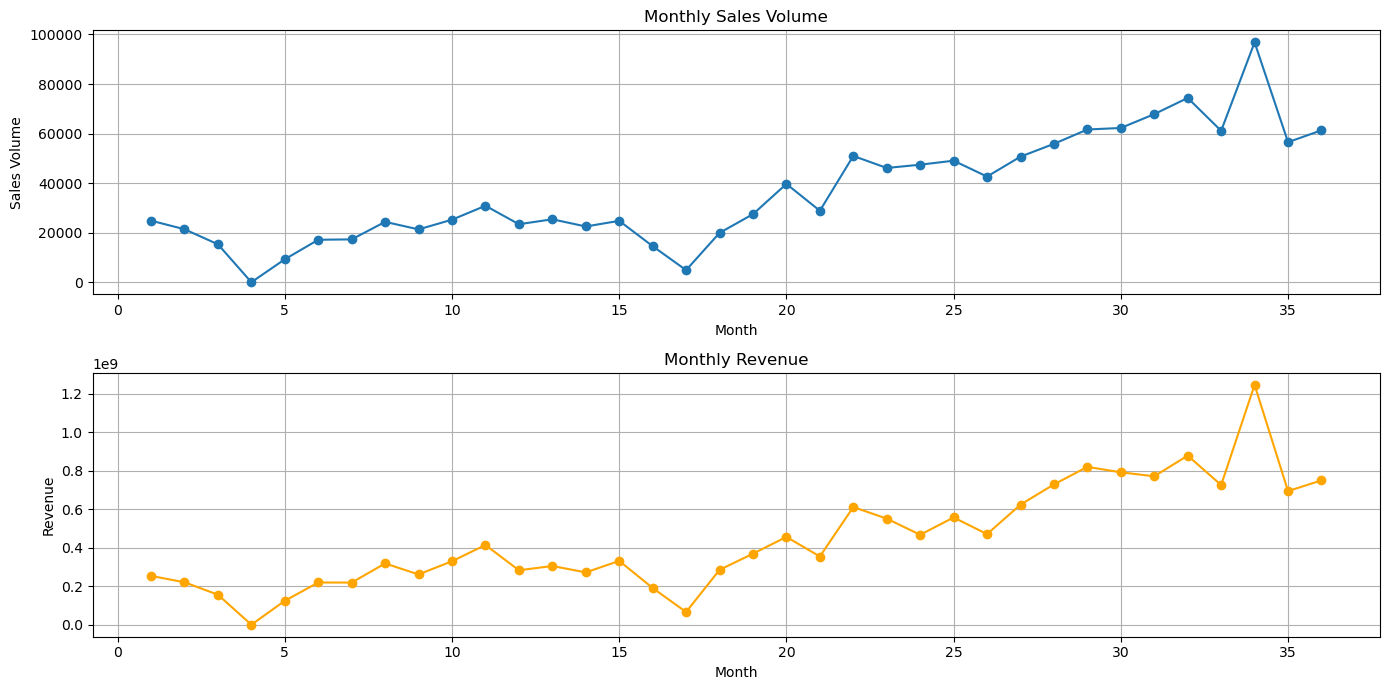

In [149]:
# Seasonality Analysis
import matplotlib.pyplot as plt

# Plot Monthly Sales Volume
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(monthly_sum['Month'] + (monthly_sum['Year'] - monthly_sum['Year'].min()) * 12,
         monthly_sum['Monthly_Sales_Volume'], marker='o')
plt.title('Monthly Sales Volume')
plt.xlabel('Month')
plt.ylabel('Sales Volume')
plt.grid(True)

# Plot Monthly Revenue
plt.subplot(2, 1, 2)
plt.plot(monthly_sum['Month'] + (monthly_sum['Year'] - monthly_sum['Year'].min()) * 12,
         monthly_sum['Monthly_Revenue'], marker='o', color='orange')
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)

plt.tight_layout()
plt.show()

# Effect of Festive Seasons

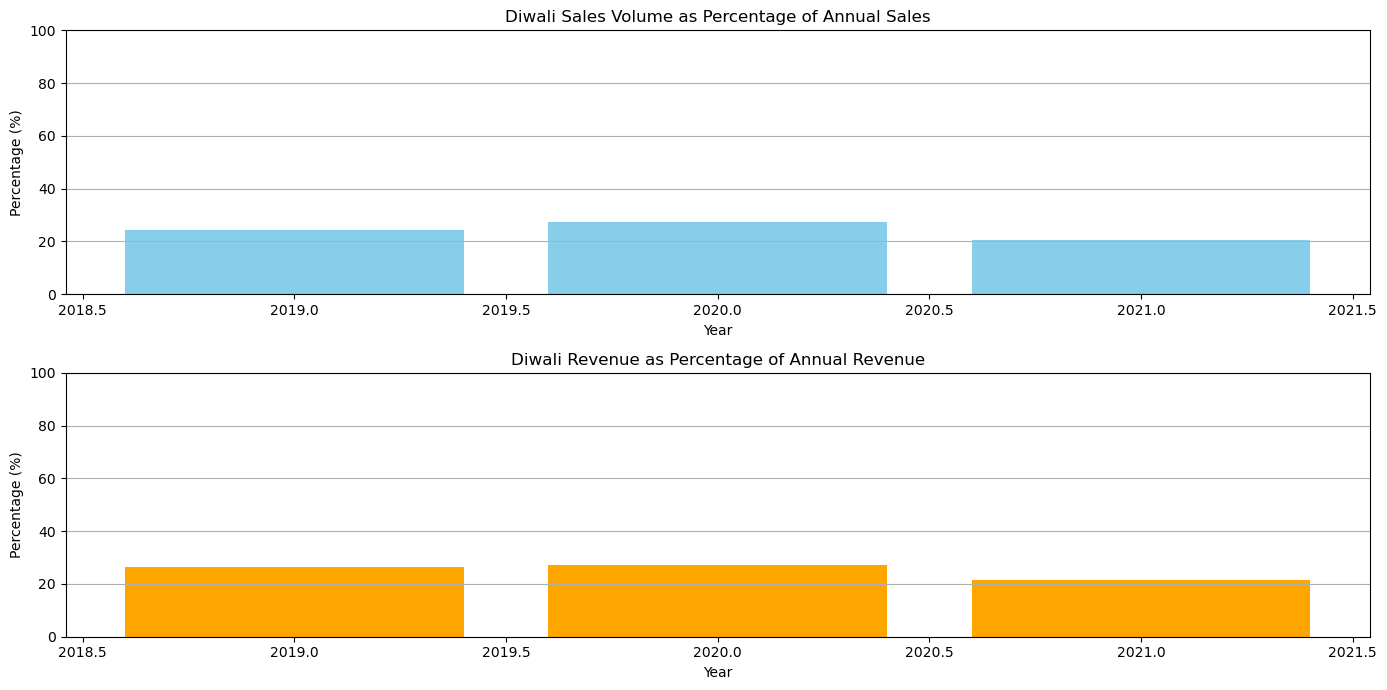

In [150]:
# Filter data for October and November (Diwali months)
diwali_summary = monthly_sum[monthly_sum['Month'].isin([10, 11])]

# Aggregate Diwali sales and revenue by year
diwali_annual_summary = diwali_summary.groupby('Year').agg({
    'Monthly_Sales_Volume': 'sum',
    'Monthly_Revenue': 'sum'
}).reset_index()

# Aggregate annual sales and revenue
annual_summary = monthly_sum.groupby('Year').agg({
    'Monthly_Sales_Volume': 'sum',
    'Monthly_Revenue': 'sum'
}).reset_index()

# Merge to calculate percentage of Diwali sales and revenue
merged = pd.merge(diwali_annual_summary, annual_summary, on='Year', suffixes=('_Diwali', '_Annual'))
merged['Sales_Volume_Percentage'] = (merged['Monthly_Sales_Volume_Diwali'] / merged['Monthly_Sales_Volume_Annual']) * 100
merged['Revenue_Percentage'] = (merged['Monthly_Revenue_Diwali'] / merged['Monthly_Revenue_Annual']) * 100
# Step 2: Plot the Data
# You can visualize the Diwali sales and revenue as a percentage of annual totals using bar plots or line plots.
# Here’s how you might adapt the plotting code:

plt.figure(figsize=(14, 7))

# Plot Diwali Sales Volume Percentage
plt.subplot(2, 1, 1)
plt.bar(merged['Year'], merged['Sales_Volume_Percentage'], color='skyblue')
plt.title('Diwali Sales Volume as Percentage of Annual Sales')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100%
plt.grid(True, axis='y')

# Plot Diwali Revenue Percentage
plt.subplot(2, 1, 2)
plt.bar(merged['Year'], merged['Revenue_Percentage'], color='orange')
plt.title('Diwali Revenue as Percentage of Annual Revenue')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100%
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()

In [151]:
# To install xlsxwriter, you use pip, which is the package installer for Python.

In [152]:
# pip install xlsxwriter

In [153]:
import pandas as pd
import xlsxwriter

# Specify the filename
file_path = 'Diwali_Sales_Analysis.xlsx'

# Write to Excel
with pd.ExcelWriter(file_path, engine='xlsxwriter') as writer:
    # Write the merged data to a sheet
    merged.to_excel(writer, sheet_name='Diwali Analysis', index=False)
    # Optional: You can also save the original monthly summary and annual summaries to separate sheets
    monthly_sum.to_excel(writer, sheet_name='Monthly Summary', index=False)
    diwali_summary.to_excel(writer, sheet_name='Diwali Summary', index=False)
    annual_summary.to_excel(writer, sheet_name='Annual Summary', index=False)

In [154]:
# after all steps download in excel/csv file
# Converting the data into csv sheet
# df.to_csv('Diwali_Sales_Analysis.csv')

In [155]:
print(f"Data written to :{file_path}")

# Reading the data back from Excel
df_diwali_analysis = pd.read_excel(file_path, sheet_name='Diwali Analysis')
df_monthly_sum = pd.read_excel(file_path, sheet_name='Monthly Summary')
df_diwali_summary = pd.read_excel(file_path, sheet_name='Diwali Summary')
df_annual_summary = pd.read_excel(file_path, sheet_name='Annual Summary')

print("Data read from Excel:") # all dataframes are shown below

Data written to :Diwali_Sales_Analysis.xlsx
Data read from Excel:


In [156]:
df_diwali_analysis

,Year,Monthly_Sales_Volume_Diwali,Monthly_Revenue_Diwali,Monthly_Sales_Volume_Annual,Monthly_Revenue_Annual,Sales_Volume_Percentage,Revenue_Percentage
0,2019,56172,7.445019e+08,230890,2.801619e+09,24.328468,26.573988
1,2020,97140,1.162862e+09,352967,4.262016e+09,27.520986,27.284315
2,2021,153400,1.940625e+09,740432,9.060153e+09,20.717635,21.419338


In [157]:
df_monthly_sum

,Year,Month,Monthly_Sales_Volume,Monthly_Revenue
0,2019,1,24883,2.538060e+08
1,2019,2,21419,2.206274e+08
2,2019,3,15351,1.562277e+08
3,2019,4,44,1.915940e+05
4,2019,5,9300,1.245726e+08
5,2019,6,17176,2.196190e+08
6,2019,7,17334,2.190717e+08
7,2019,8,24398,3.186138e+08
8,2019,9,21367,2.614013e+08
9,2019,10,25274,3.301203e+08


In [158]:
df_diwali_summary

,Year,Month,Monthly_Sales_Volume,Monthly_Revenue
0,2019,10,25274,3.301203e+08
1,2019,11,30898,4.143816e+08
2,2020,10,50998,6.114889e+08
3,2020,11,46142,5.513729e+08
4,2021,10,96836,1.246357e+09
5,2021,11,56564,6.942682e+08


In [159]:
df_annual_summary

,Year,Monthly_Sales_Volume,Monthly_Revenue
0,2019,230890,2.801619e+09
1,2020,352967,4.262016e+09
2,2021,740432,9.060153e+09


# Product Segmentation - Filter Data for Specific Categories

In [160]:
# Filter for TVs, Laptops, and Mobile Phones
categories = ['TVs', 'Laptops', 'Mobile Phones']
segmentation_data = data[data['MerchCategoryDescription'].isin(categories)]

In [161]:
# Define price(salevalue) segments
def categorize_price(price, data):
    if price >= data['SaleValue'].quantile(0.67):
        return 'Premium'
    elif price >= data['SaleValue'].quantile(0.33):
        return 'Mainstream'
    else:
        return 'Value'

segmentation_data['Price_Segment'] = segmentation_data.groupby('MerchCategoryDescription')['SaleValue'].transform(lambda x: x.apply(lambda p: categorize_price(p, x)))
segmentation_data['Price_Segment']

Series([], Name: Price_Segment, dtype: float64)

# 1. Return the Cust ID that received the 5th highest number of campaigns

In [162]:
# Count the number of campaigns per CustID
campaign_counts = df['CustID'].value_counts().reset_index()
campaign_counts.columns = ['CustID', 'CampaignCount']

# Get the 5th highest
# .iloc[-1]: This selects the last row from the result of the previous operation
fifth_highest = campaign_counts.nlargest(5, 'CampaignCount').iloc[-1]   #5 rows with the largest values in the 'CampaignCount' column
print(f"Cust ID with the 5th highest campaigns: {fifth_highest['CustID']}")

Cust ID with the 5th highest campaigns: 54655


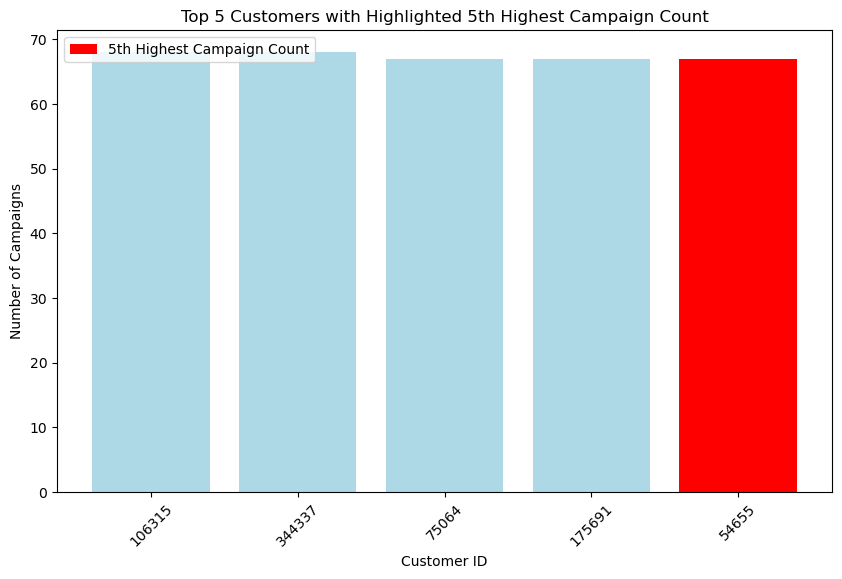

In [173]:
# Get the top 5 customers with the highest campaign counts
top_campaigns = campaign_counts.nlargest(5, 'CampaignCount')

# create a scatter plot or a separate bar highlighting
# Highlighting the 5th highest customer in a separate bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_campaigns['CustID'].astype(str), top_campaigns['CampaignCount'], color='lightblue')
plt.bar(fifth_highest['CustID'].astype(str), fifth_highest['CampaignCount'], color='red', label='5th Highest Campaign Count')
plt.title('Top 5 Customers with Highlighted 5th Highest Campaign Count')
plt.xlabel('Customer ID')
plt.ylabel('Number of Campaigns')
plt.xticks(rotation=45)
plt.legend()
plt.show()


# 2. Find the States with minimum and maximum average delivery time

In [163]:
# Calculate delivery times (.dt.total_seconds() to get total seconds and divide by 60 to convert to minutes.)
df_filled['DeliveryTime'] = (df_filled['deliveryinprogress_timestamp'] - df_filled['sale_timestamp']).dt.total_seconds() / 60

# Group by state and calculate average delivery time
average_delivery = df_filled.groupby('shiptostate')['DeliveryTime'].mean().reset_index()

# Get minimum and maximum
min_state = average_delivery.loc[average_delivery['DeliveryTime'].idxmin()]
max_state = average_delivery.loc[average_delivery['DeliveryTime'].idxmax()]

print(f"State with minimum average delivery time: {min_state['shiptostate']}, Time: {min_state['DeliveryTime']}")
print(f"State with maximum average delivery time: {max_state['shiptostate']}, Time: {max_state['DeliveryTime']}")

State with minimum average delivery time: Karnataka , Time: 118.80397022332507
State with maximum average delivery time: Jammu And Kashmir, Time: 2859.5


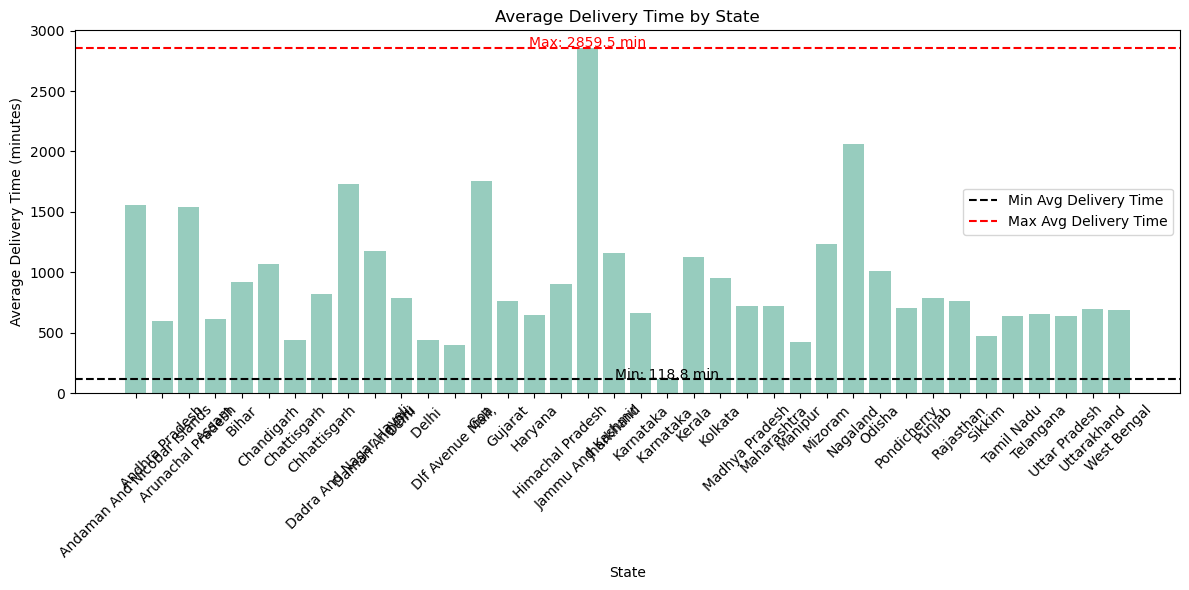

In [241]:
import matplotlib.pyplot as plt

# Bar chart for average delivery time by state
plt.figure(figsize=(12, 6))
plt.bar(average_delivery['shiptostate'], average_delivery['DeliveryTime'], color='#97ccbe')
plt.title('Average Delivery Time by State')
plt.xlabel('State')
plt.ylabel('Average Delivery Time (minutes)')
plt.xticks(rotation=45)
plt.axhline(y=min_state['DeliveryTime'], color='black', linestyle='--', label='Min Avg Delivery Time')
plt.axhline(y=max_state['DeliveryTime'], color='red', linestyle='--', label='Max Avg Delivery Time')
plt.text(x=min_state['shiptostate'], y=min_state['DeliveryTime'] + 1, 
         s=f"Min: {min_state['DeliveryTime']:.1f} min", color='black', ha='center')
plt.text(x=max_state['shiptostate'], y=max_state['DeliveryTime'] + 1, 
         s=f"Max: {max_state['DeliveryTime']:.1f} min", color='red', ha='center')
plt.legend()
plt.tight_layout()
plt.show()


# 3. Create a dataset of customer id whose monthly transaction amount has increased  every month for at least 3 consecutive months.

In [226]:
import pandas as pd

# Convert the transaction date to datetime
cst_trn_df['OrderDate'] = pd.to_datetime(cst_trn_df['OrderDate'])

# Extract year and month for grouping
cst_trn_df['YearMonth'] = cst_trn_df['OrderDate'].dt.to_period('M')
# cst_trn_df['YearMonth'] 

# Group by customerid and month to calculate monthly transaction amounts
monthly_transactions = cst_trn_df.groupby(['CustID', 'YearMonth'])['SaleValue'].sum().reset_index()
# monthly_transactions  (give the output of custid,yearmonth,salevalue)

# Sort by CustID and YearMonth
monthly_transactions.sort_values(by=['CustID', 'YearMonth'], inplace=True)

# Function to check for at least 3 consecutive months of increasing amounts
def find_increasing_customers(cst_trn_df):
    increasing_cust_ids = []
    for cust_id, group in cst_trn_df.groupby('CustID'):
        if len(group) >= 3 and all(x < y for x, y in zip(group['SaleValue'].values, group['SaleValue'].values[1:])):
            increasing_cust_ids.append(cust_id)
    return increasing_cust_ids

# Find customers with increasing monthly transactions
increasing_cust_ids = find_increasing_customers(monthly_transactions)

# Create a new DataFrame with the results
increasing_cust_df = pd.DataFrame(increasing_cust_ids, columns=['CustID'])

# Display the resulting DataFrame
print("Dataset of Customer IDs with Increasing Monthly Transactions:")
print(increasing_cust_df)

# Optional: Save to CSV
# increasing_cust_df.to_csv('increasing_cust_ids.csv', index=False)


Dataset of Customer IDs with Increasing Monthly Transactions:
      CustID
0         70
1        133
2        222
3        225
4        259
...      ...
3517  455054
3518  456965
3519  457424
3520  465453
3521  474746

[3522 rows x 1 columns]


In [215]:
cst_trn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1625393 entries, 0 to 1625392
Data columns (total 20 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   CustID                    1625393 non-null  int64         
 1   ItemDesc                  1625393 non-null  object        
 2   MerchCategoryDescription  1625393 non-null  object        
 3   MerchClassDescription     1625393 non-null  object        
 4   MerchGroupDescription     1625393 non-null  object        
 5   SaleValue                 1625393 non-null  float64       
 6   OrderedQuantity           1625393 non-null  int64         
 7   OrderDate                 1625393 non-null  datetime64[ns]
 8   ReturnFlag                1625393 non-null  object        
 9   SalesChannelCode          1625393 non-null  object        
 10  Ecom_BnM_Indicator        1625393 non-null  object        
 11  StoreID                   1625393 non-null  float6

In [213]:
# Convert YearMonth to PeriodIndex
cst_trn_df['YearMonth'] = pd.PeriodIndex(cst_trn_df['YearMonth'])

# 4. Product Assortment Analysis for the Top 5 Brick and Mortar Stores

In [243]:
cst_trn_df.columns

Index(['CustID', 'ItemDesc', 'MerchCategoryDescription',
       'MerchClassDescription', 'MerchGroupDescription', 'SaleValue',
       'OrderedQuantity', 'OrderDate', 'ReturnFlag', 'SalesChannelCode',
       'Ecom_BnM_Indicator', 'StoreID', 'StoreCode', 'StoreCity', 'StoreState',
       'StorePincode', 'SaleMonth', 'Month', 'Year', 'YearMonth'],
      dtype='object')

In [171]:
# Step 1: Filter for Brick and Mortar stores
bnm_stores = cst_trn_df[cst_trn_df['Ecom_BnM_Indicator'] == 'BnM']

# Step 2: Aggregate sales data to find total sales for each store
store_sales = (bnm_stores.groupby('StoreID', as_index=False).agg(Total_Sales=('SaleValue', 'sum'),Total_Quantity=('OrderedQuantity', 'sum')))

# Step 3: Identify the top 5 stores based on total sales
top_stores = store_sales.nlargest(5, 'Total_Sales')

# Step 4: Analyze product assortment for these top stores
top_stores_data = bnm_stores[bnm_stores['StoreID'].isin(top_stores['StoreID'])]

# Now we can analyze the assortment for each top store
product_assortment = (top_stores_data.groupby(['StoreID', 'MerchCategoryDescription'], as_index=False)
                      .agg(Product_Count=('ItemDesc', 'nunique'),Total_Sales=('SaleValue', 'sum'), Total_Quantity=('OrderedQuantity', 'sum')))

# Optionally, we can sort the products by total sales
product_assortment = product_assortment.sort_values(by=['StoreID', 'Total_Sales'], ascending=False)

# Display results
print("Top 5 Brick and Mortar Stores:")
print(top_stores)
print("\nProduct Assortment Analysis:")
print(product_assortment)

Top 5 Brick and Mortar Stores:
Empty DataFrame
Columns: [StoreID, Total_Sales, Total_Quantity]
Index: []

Product Assortment Analysis:
Empty DataFrame
Columns: [StoreID, MerchCategoryDescription, Product_Count, Total_Sales, Total_Quantity]
Index: []
